In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read data from CSV and display first 5 rows.
df = pd.read_csv("FakeNewsNet.csv")
df.head()
df = df.iloc[:5000]

In [ ]:
# Check label values and number of entries
df["real"].unique(), len(df)

(array([1, 0]), 5000)

In [ ]:
# Remove rows that have NaNs
df = df.dropna()

In [ ]:
# Make sure NaN labels were removed, check how many entries are left
df["real"].unique(), len(df)

In [ ]:
len(df["title"].unique()) == len(df)

False

In [ ]:
# Remove duplicated titles
df = df.drop_duplicates(subset=["title"])

In [ ]:
len(df)

4821

In [ ]:
# Determine number of examples in each class
df["real"].value_counts()

real
1    3701
0    1120
Name: count, dtype: int64

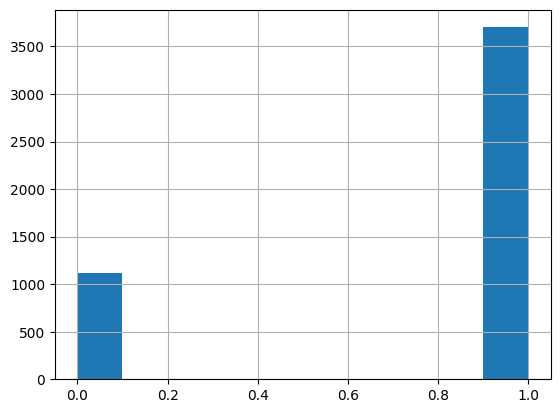

In [ ]:
df["real"].hist()
plt.show()

In [ ]:
X = df["title"]
y = df["real"]

In [ ]:
y.values[0]

1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
y = oh.fit_transform(y.values.reshape(-1, 1)).toarray()

In [ ]:
y[0]

array([0., 1.])

In [ ]:
from tqdm import tqdm

def remove_punctuation(word):
  punctuation = [",", ";", "!", "?", ".", "-", "'", '"', "(", ")", "[", "]", "{", "}", "`"]
  for c  in punctuation:
    word = word.replace(c, "")
  return word

vocabulary = []
for value in tqdm(X.values):
  words = value.split(" ")
  words = [remove_punctuation(w) for w in words]
  for word in words:
    if word not in vocabulary:
      word = word.lower()
      if len(word) > 3:
        vocabulary.append(word)

len(vocabulary)

100%|██████████| 4821/4821 [00:13<00:00, 366.41it/s]


34174

In [ ]:
data = []
for value in tqdm(X.values):
  text = np.zeros(len(vocabulary))
  words = value.split(" ")
  words = [remove_punctuation(w) for w in words]
  for word in words:
      word = word.lower()
      if word in vocabulary:
        idx = vocabulary.index(word)
        text[idx] += 1
  data.append(text)

100%|██████████| 4821/4821 [00:14<00:00, 331.99it/s]


In [ ]:
data = np.array(data)
data.shape

(4821, 34174)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3856, 34174), (3856, 2), (965, 34174), (965, 2))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=data.shape[1], activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                683500    
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 683997 (2.61 MB)
Trainable params: 683997 (2.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=10)

Epoch 1/25
386/386 [==============================] - 4s 6ms/step - loss: 0.4931 - accuracy: 0.7866 - val_loss: 0.4092 - val_accuracy: 0.8259
Epoch 2/25
386/386 [==============================] - 2s 5ms/step - loss: 0.2409 - accuracy: 0.9066 - val_loss: 0.4648 - val_accuracy: 0.8073
Epoch 3/25
386/386 [==============================] - 2s 5ms/step - loss: 0.0874 - accuracy: 0.9702 - val_loss: 0.6457 - val_accuracy: 0.7772
Epoch 4/25
386/386 [==============================] - 2s 5ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.8064 - val_accuracy: 0.7865
Epoch 5/25
386/386 [==============================] - 2s 4ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.9449 - val_accuracy: 0.7813
Epoch 6/25
386/386 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 1.0769 - val_accuracy: 0.7762
Epoch 7/25
386/386 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 1.1643 - val_accuracy: 0.7803
Epoch 

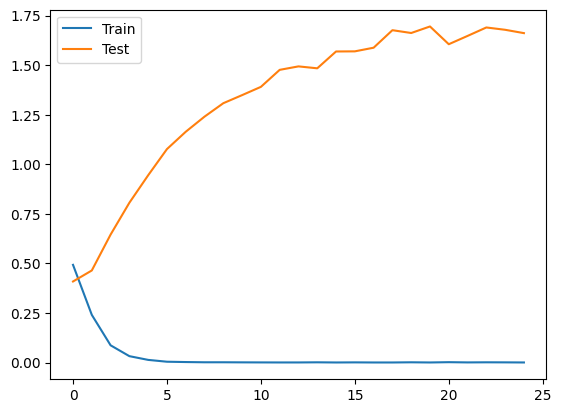

In [ ]:
plt.figure()
plt.plot(range(25), history.history["loss"], label="Train")
plt.plot(range(25), history.history["val_loss"], label="Test")
plt.legend()
plt.show()

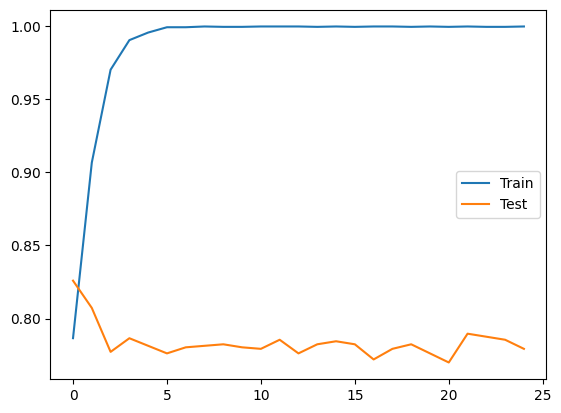

In [ ]:
plt.figure()
plt.plot(range(25), history.history["accuracy"], label="Train")
plt.plot(range(25), history.history["val_accuracy"], label="Test")
plt.legend()
plt.show()